In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
hsNData1 = pd.read_csv(r'E:\Dhaval\Elastic Search\Python\E-Book\Data File\highstoragesystem-data-for-energy-optimization\HRSS_normal_optimized.csv')

In [2]:
#def clean_strings(strings):
result = []
cnt = 0
for index, value in enumerate(hsNData1['Timestamp']):
    if index == 0:
        result.append(cnt)
    elif index == len(hsNData1['Timestamp'])-1:
        result.append(cnt)
    elif hsNData1['Timestamp'][index] - hsNData1['Timestamp'][index - 1] < 0:        
        result.append(cnt+1)
        cnt += 1
    else:
        result.append(cnt)
hsNData1['sampleNum'] = result

In [3]:
def getDataofSample(Alldata, sampleNo = 0):
    Sampledata = Alldata.loc[Alldata['sampleNum'] == sampleNo]
    indexs = np.arange(len(Sampledata))
    Sampledata.index = indexs
    return Sampledata

In [18]:
def createOperationColumn(data,column,operation):
    import math
    sumval = 0
    differnce = []
    summ = []
    logg = []
    #operation = 'L'
    #column = 'O_w_HR_power'
    #data
    try:
        for index, value in enumerate(data[column]):    
            if index == 0:
                if operation == 'D':
                    differnce.append(0)
                elif operation == 'S':
                    summ.append(0)
                else:
                    logg.append(math.log(data[column][index]))
            else:
                if operation == 'D':
                    differnce.append(data[column][index] - data[column][index - 1])
                elif operation == 'S':
                    sumval = data[column][index] + sumval
                    summ.append(sumval)
                else:
                    logg.append(math.log(data[column][index]))
        if operation == 'D':
            data['D'] = differnce
        elif operation == 'S':
            data['S'] = summ
        else:
            data['L'] = logg
        return data
    except:
        print('Natural log not possible values less than or equal to 0')

In [19]:
import time
import pylab as pl
from IPython import display
#columns = ['I_w_BLO_Weg', 'O_w_BLO_power', 'O_w_BLO_voltage']
#samples = [1,2,3]
#operation = 'S'
z = 1
def CreateTimeSeriesChart(columns = [],samples = [], operation = 'N'):    
    if len(samples) == 0:
        samples = set(hsNData1['sampleNum'])
        samples.remove(len(samples)-1)
    if len(columns) == 0:
        columns = hsNData1.columns
    for column in columns:
        for sampleNo in samples:                
            data = getDataofSample(hsNData1,sampleNo)
            if column == 'Timestamp' or column == 'Labels' or column == 'sampleNum':
                z == z
            else:                                    
                pl.clf()
                if operation == 'N':
                    pl.plot(data['Timestamp'],data[column])
                    pl.title('Attribute : ' + column + '    Sample No : ' + str(sampleNo))
                else:
                    data2 = createOperationColumn(data,column,operation)
                    pl.plot(data2['Timestamp'],data2[operation])
                    if operation == 'L':
                        pl.title('Attribute : Log of ' + column + '    Sample No : ' + str(sampleNo))
                    elif operation == 'D':
                        pl.title('Attribute : Difference of ' + column + '    Sample No : ' + str(sampleNo))
                    else:
                        pl.title('Attribute : Sum of ' + column + '    Sample No : ' + str(sampleNo))
                pl.gcf().show()
                display.display(pl.gcf())
                display.clear_output(wait=True)
                time.sleep(1.0)                      

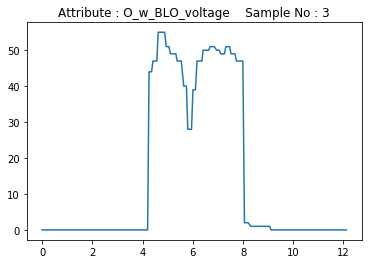

In [20]:
columns = ['O_w_BLO_voltage']
samples = [3]
sampleNo = 1
try:
    CreateTimeSeriesChart(columns,samples)#, 'S')
except:
    print('Please check data')

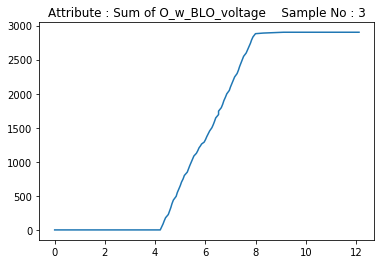

In [21]:
CreateTimeSeriesChart(columns,samples, 'S')